In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [2]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['MedHouseVal'] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [4]:
x = df.drop('MedHouseVal', axis = 1).values
y = df['MedHouseVal'].values

In [8]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [14]:
# scale the data to bring the values of differnt columns in same scale

from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [24]:
x_train_scaled.shape[1]

8

In [25]:
import tensorflow as tf
import keras

In [31]:
# build the model

model = keras.models.Sequential([
    keras.Input(shape = (x_train_scaled.shape[1],)),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(1) # output = median house value
])

#complie the model : Optimizer, loss function, and metrics

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

In [32]:
history = model.fit(x_train_scaled,  y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

Epoch 1/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.3510 - mae: 1.0374 - val_loss: 0.5207 - val_mae: 0.5114
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4651 - mae: 0.4815 - val_loss: 0.4246 - val_mae: 0.4609
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3970 - mae: 0.4467 - val_loss: 0.4109 - val_mae: 0.4597
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3840 - mae: 0.4339 - val_loss: 0.3904 - val_mae: 0.4357
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3727 - mae: 0.4246 - val_loss: 0.3669 - val_mae: 0.4256
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3523 - mae: 0.4216 - val_loss: 0.3637 - val_mae: 0.4298
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3340 - mae: 0.4049 - val_loss: 0.3852 - val_mae: 0.4358
Epoch 8/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3372 - mae: 0.4029 - val_loss: 0.3437 - val_mae: 0.4073
Epoch 9/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [33]:
y_pred = model.predict(x_test_scaled)

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [37]:
history

In [38]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [39]:
import matplotlib.pyplot as plt

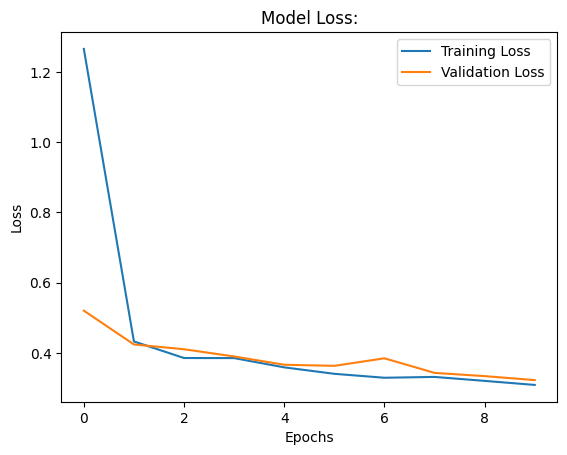

In [42]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
# print(loss)
plt.plot(loss)
plt.plot(val_loss)
plt.title("Model Loss:")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

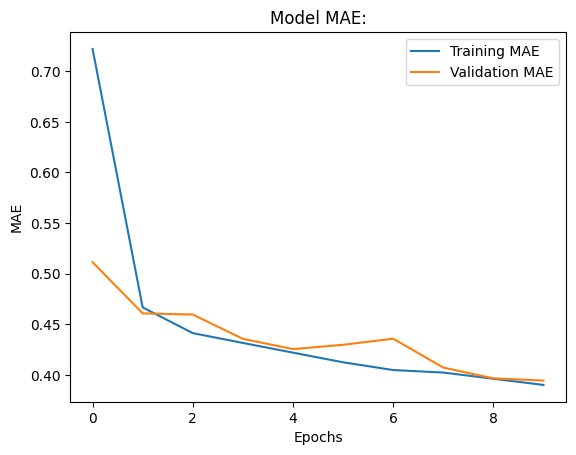

In [43]:
plt.plot(history_dict['mae'])
plt.plot(history_dict['val_mae'])
plt.title("Model MAE:")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend(["Training MAE", "Validation MAE"])
plt.show()

In [44]:
y_pred = model.predict(x_test_scaled)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [46]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.3193635173362049
Mean Absolute Error: 0.3927826755077052


In [49]:
result = model.evaluate(x_test_scaled, y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3172 - mae: 0.3958


In [50]:
result

[0.3193635940551758, 0.39278268814086914]